## Linear Models

You may recall from a Statistics class, the notion of fitting a line, or a **linear model**, to some data. It may have been referred to as a linear regression model. 

The equation of the line is 

$$ y = \beta_1 x + \beta_0$$

We observed some pairs of data $(x_i,y_i), i = i...n $ 

Then we can write a regression model as 

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\qquad i=1,\dots,n$$



### Linear Regression is a model of the data  

What frequently is forgotten is that the form of the model (in this case linear) and the parameters (in this case $\beta_1$) have a meaning associated with them. By fitting the model to the data we express our scientific intuition that **the data was generated by a process reflected in the model**.  

In the case of a linear model we are hypothesizing a linear relationship expressed by a **rate** given by the **parameter** $\beta_1$.  Ideally, you chose a model so that that knowing that rate gives you some intuition about the process.   

In Statistics, the emphasis in performing a regression analysis is determining whether how well a line captures the relationship between $x$ and $y$.  This is often done by examining the *significance* of the model parameters or perhaps by quantifying how much of the *variance* of the data can be accounted for by the the model.   

The Machine Learning, we believe if our model is meaningful, we should be able to use the model to predict new data points.  This is going to be a point of emphasis throughout this class.  Models of data, especially complicated ones, are only meaningful if they can predict outcomes of new experiments.  


### Error Function 

In order to fit a model to data, we need a way to measure how good our model is, or an **error** measurement, that we can use to evaluate our model. 

The error is a function of the model parameters ($\phi$).  The data $(x,y)$ are fixed values. 

$$ error = f(\phi \vert data) $$

The error function of a model, given the data, is a function whose output is the error.  The input variables are possible values of the parameters, **while the data is fixed**. 

Note the vertical line above ($\vert$) separates the inputs into two groups. On the left of the vertical parameters are the variables (parameters), on the right of the vertical line are the known data.  

In the case of a linear model: 

$$ error = f(\beta_1,\beta_0|(x,y)) $$

In our linear model, the parameters $\phi = (\beta_1,\beta_0)$, and the error depends on the values of the parameters and the data $(x,y)$.  


### Least-squares fit 

The challenge then is to develop a procedure to minimize error - that is to say, to find the models that best fit the data. (More generally, we could also ask to compare different forms of models)

Least squares fitting is the most basic and direct approach for learning and evaluating models. In a least-squares fit, the error function is defined as the sum of squared error over all the data. Squared errors are calculated as the square of the difference between the model prediction of a data point, and the data point itself. 

The choice of parameters ($\lambda$) which result in a model with the lowest error, defined in terms of least squares, is the best model. When we talk about fitting a model with least squares, we mean finding the solution for the **parameters** that has the lowest **least square error** - the lowest value for the sum of squared errors.

An important way to think about this is the  **error function** is not a function of the data its a function of the parameters. 

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random 

### Seed the random number generator

In [ ]:
plt.figure()
plt.plot(x,y,'bo')
plt.plot(x,ylinear,'k-')
plt.plot(x,yfit,'rs-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#create the random number generator object
rng = random.default_rng(seed = myseed)

In [40]:
#let's test the random number generator with a normal distribution
# the line below makes an array with 10 random numbers drawn from a normal distribution with a mean of 1 and a standard deviation of 2
x = rng.normal(1,2,10)
print(x)

[-2.20767361  1.12819983  2.48178259  1.30523839  2.72748778  6.82619845
 -1.95764672  2.89094595 -2.33227091  1.68748916]


### Simulate Data 
I hope by the end of this class, you are comfortable with the idea of simulating data in order to test a method or your code. 
This is a really useful skill.  When you encounter a new data analysis method or piece of code, if you just apply it to your real data its hard to understand what its doing.  
But, if you apply it to data with structure you know in advance, you can better understand how the method works.  

In [41]:
# Create some data
# x is an evenly space array of integers
x = np.arange(0, 20)

# y is some data with underlying relationship y = beta_1* x + beta_0
#  For this example, the true relation of the data is y = 2x + 5
true_beta_1 = 2
true_beta_0 = 5
ylinear = true_beta_1 * x + true_beta_0
noise_std = 20
# Add some noise to the y dimension
noise = rng.normal(0, noise_std, len(x)) 
#the noise is drawn from a normal distribution with mean 0 and standard deviation noise_std
y = ylinear + noise

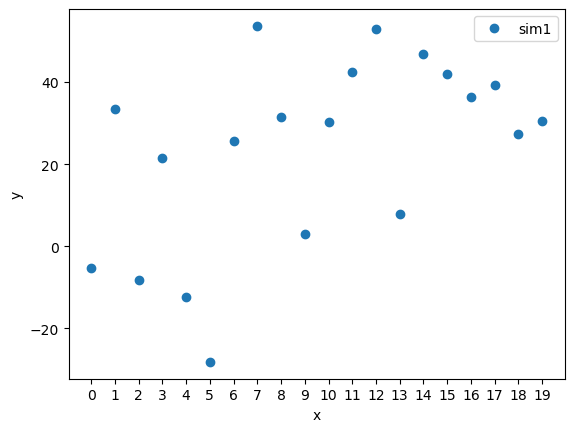

In [42]:
#plot the data.  ms is the markersize 
plt.plot(x, y, '.', ms=12,label = 'sim1');
plt.legend()
plt.xlabel('x')
plt.xticks(x)
plt.ylabel('y')
plt.show()

### Centering Data 
To make my life easy, Im going to remove the mean of the x and y data.

This is called **centering** the data, and is often required in data analysis.

Centering has no effect on the linear relationship between the variables ($\beta_1$).

It simplifies our model by remove the need for the intercept ($\beta_0$)  

In [43]:
x_c = x - np.mean(x)
y_c = y - np.mean(y)

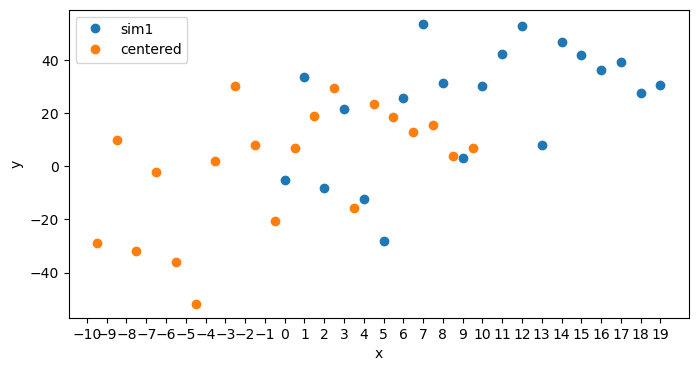

In [44]:
plt.figure(figsize = (8,4))
plt.plot(x, y, '.', ms=12,label = 'sim1');
plt.plot(x_c, y_c, '.', ms=12,label = 'centered');
plt.legend()
plt.xlabel('x')
plt.xticks(np.arange(-10,20,1))
plt.ylabel('y')
plt.show()


### Error function as sum of squared errors.  

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i,\qquad i=1,\dots,n $$

$$ error(\beta_1,\beta_0 |(x_i,y_i)) =\sum_{i=1}^n \big(y_i-\beta_0-\beta_1x_i\big)^2.$$

This is a standard formulation of the sum of squared errors and we will use it to establish the general solution. 
However, for now, lets assume the data is *centered*, so we can ignore $\beta_0$ and focus on $\beta_1$

Assume we know nothing. What do we do?  (Guess!)

In [45]:
betatest = np.linspace(0.1, 5,50) #here is I got a list of possible values for beta_1  
error = np.zeros(50) #I made an empty array to hold the error values
beta0 = 0 #since the data is centered, we can ignore beta0 for now
for j in range(len(betatest)):
    yprime = beta0 + betatest[j]*x_c  #This is guess of the model prediction by trying a value for beta_1
    error[j] = np.sum(np.square(y_c-yprime)) #this is the sum of squared errors for this guess
    

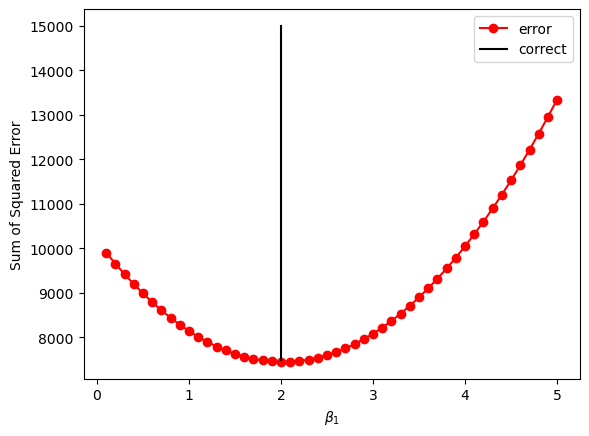

In [46]:
plt.figure()
plt.plot(betatest,error,'ro-',label ='error')
plt.plot([true_beta_1,true_beta_1],[7500,15000],'k-',label='correct')
plt.xlabel('$\\beta_1$')
plt.legend()
plt.ylabel('Sum of Squared Error')
plt.show()

### Minimizing error function 

In order to find the minimum of the error function, I would want to take the derivative of the error function and set it equal to 0.  I am going to call it $S$ as its the sum of errors. 

$$ S(\beta_1,\beta_0 |(x_i,y_i)) = \sum_{i=i}^n e_i = \sum_{i=1}^n \big(y_i-\beta_0-\beta_1x_i\big)^2.$$

#### 1. Derivative with Respect to $\beta_1$

For each term in the sum $e_i(\beta_1)=\big(y_i-\beta_0-\beta_1x_i\big)^2$,
$$\frac{\partial f_i}{\partial \beta_1}
 =2\big(y_i-\beta_0-\beta_1x_i\big)\cdot(-x_i) \\
=-2x_i\big(y_i-\beta_0-\beta_1x_i\big) $$

Summing over $i$:

$$ \frac{\partial S}{\partial \beta_1}
=\sum_{i=1}^n -2x_i\big(y_i-\beta_0-\beta_1x_i\big)
=-2\sum x_i y_i+2\beta_0\sum x_i+2\beta_1\sum x_i^2 $$

Setting equal to zero:

$$ -2\sum x_i y_i+2\beta_0\sum x_i+2\beta_1\sum x_i^2=0
\quad\Rightarrow\quad
\beta_0\sum x_i+\beta_1\sum x_i^2=\sum x_i y_i $$



#### 2. Derivative with Respect to $\beta_0$

For each term $e_i(\beta_0)=\big(y_i-\beta_0-\beta_1x_i\big)^2$,


$$ \frac{\partial f_i}{\partial \beta_0}
=2\big(y_i-\beta_0-\beta_1x_i\big)\cdot\frac{\partial (y_i-\beta_0-\beta_1x_i)}{\partial\beta_0} \\
=2\big(y_i-\beta_0-\beta_1x_i\big)\cdot(-1) \\
=-2\big(y_i-\beta_0-\beta_1x_i\big)$$

Summing over $i$: 

$$ \frac{\partial S}{\partial \beta_0}
=\sum_{i=1}^n -2\big(y_i-\beta_0-\beta_1x_i\big)
=-2\sum_{i=1}^n y_i +2n\beta_0+2\beta_1\sum_{i=1}^n x_i $$

Setting equal to zero:

$$ -2\sum y_i +2n\beta_0+2\beta_1\sum x_i=0
\quad\Rightarrow\quad
n\beta_0+\beta_1\sum x_i=\sum y_i $$

3. Solve the Equations

Let
\begin{equation}
S_x=\sum x_i,\quad S_y=\sum y_i,\quad S_{xx}=\sum x_i^2,\quad S_{xy}=\sum x_i y_i,\quad n=\text{sample size}.
\end{equation}

Equations:
\begin{align}
n\beta_0+\beta_1 S_x &= S_y, \\
\beta_0 S_x+\beta_1 S_{xx} &= S_{xy}.
\end{align}

From the first:
\begin{equation}
\beta_0=\frac{S_y-\beta_1 S_x}{n}.
\end{equation}

Plug into the second:
\begin{equation}
\frac{S_y-\beta_1 S_x}{n}\,S_x+\beta_1 S_{xx}=S_{xy}
\end{equation}

Expand:
\begin{equation}
\frac{S_y S_x}{n}-\beta_1\frac{S_x^2}{n}+\beta_1 S_{xx}=S_{xy}
\end{equation}

Group $\beta_1$:
\begin{equation}
\beta_1\Big(S_{xx}-\frac{S_x^2}{n}\Big)=S_{xy}-\frac{S_y S_x}{n}
\end{equation}

Thus
\begin{equation}
\hat\beta_1=\dfrac{S_{xy}-\frac{S_x S_y}{n}}{S_{xx}-\frac{S_x^2}{n}}
=\frac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2},
\end{equation}
where $\bar x=S_x/n$, $\bar y=S_y/n$.  These are the sample means. 

Then
\begin{equation}
\hat\beta_0=\bar y-\hat\beta_1\bar x.
\end{equation}

You might have been taught this formula in a stats class.  Now you know where it comes from.  

* $\beta_0$ really doesnt matter and just complicates your life.  

* In addition the solution depends on removing the mean of x and y anyway, so always remove them.  

I find this representation more intuition building 


$$\hat{\beta}_1
= \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}, 
\qquad
\hat{\beta}_0
= \bar{y} - \hat{\beta}_1 \,\bar{x} $$

where
$$ \mathrm{Cov}(x,y) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}),
\quad
\mathrm{Var}(x) = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2
$$ 



### A function that solves fits a linear regression model

In [47]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray):
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])

In [48]:
betas = simple_linear_regression_fit(x_c,y_c) #Im using the centered data
print(f" Estimated Slope: {betas[1]}")
print(f"Actual Slope: {true_beta_1}")


Reshaping features array.
Reshaping observations array.
 Estimated Slope: 2.0219457056367176
Actual Slope: 2


Lets repeat with the not centered data. 

In [49]:
betas = simple_linear_regression_fit(x,y) #Im using the original data
print(f" Estimated Slope: {betas[1]}")
print(f"Actual Slope: {true_beta_1}")
print(f" Estimated Intercept: {betas[0]}")
print(f"Actual Intercept: {true_beta_0}")

Reshaping features array.
Reshaping observations array.
 Estimated Slope: 2.0219457056367176
Actual Slope: 2
 Estimated Intercept: 4.321781993156325
Actual Intercept: 5


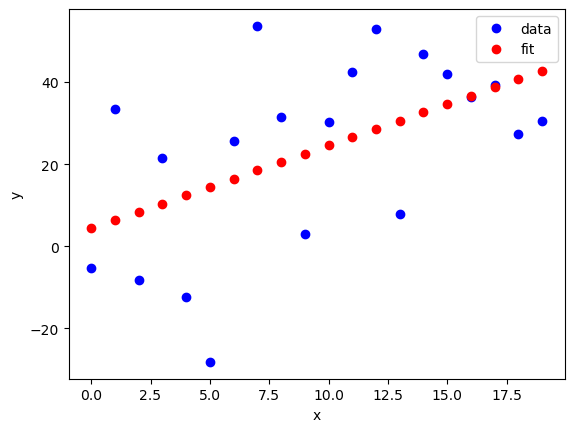

In [50]:
plt.figure()
plt.plot(x,y,'bo',label = 'data')
yfit = betas[0] + betas[1]*x
plt.plot(x,yfit,'ro',label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### The concept of training and test data as a measure of model quality

I have not introduced any statistical analysis of the results of fit (so far).  I want to instead introduce a conceptually different way of thinking about how well the model captures **the process generating the data**

In this example, I am going to draw x from a normal distribution, and then impose a linear model to compute y and add measurement noise drawn from a normal distribution. 


$$ x \sim \mathcal{N}(\mu_x, \sigma_x^2) $$
$$ \varepsilon \sim \mathcal{N}(0,\sigma_\varepsilon^2) $$

$$ y = \beta_0 + \beta_1 x + \varepsilon $$


In [51]:
nsamples = 100 #number of samples
mux = 0 #mean of x  
sdx = 5 #standard deviation of x
x = rng.normal(mux,sdx,nsamples) #generate random x values       
beta0 = 0 #intercept
beta1 = 2 #slope
sd_noise = 50 #standard deviation of noise
epsilon = np.random.normal(0,sd_noise,nsamples) #generate noise
ylinear = beta0+beta1*x #true underlying linear relationship
y = beta0+beta1*x+ epsilon #observed data with noise
betas = simple_linear_regression_fit(x,y) #fit the model
print(betas)
yfit = betas[0] + betas[1]*x #predicted y values from the fitted model


Reshaping features array.
Reshaping observations array.
[-2.47755646  2.86038418]


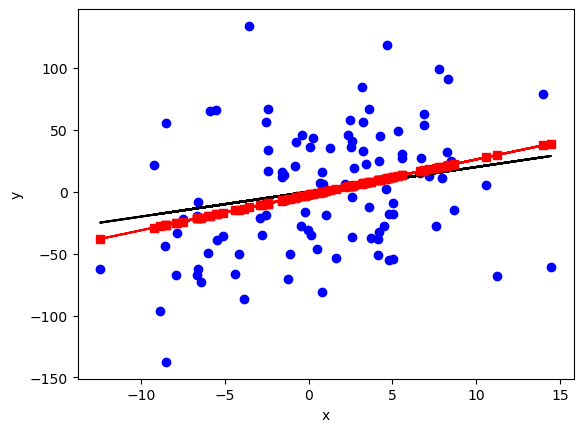

In [52]:
plt.figure()
plt.plot(x,y,'bo')
plt.plot(x,ylinear,'k-')
plt.plot(x,yfit,'rs-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If we were in a stats class, we would be evaluating 
* **how well does the line fit the data we have observed**
In this class, we will be interested in a different question 
* **how well does the line fit the data we have not yet observed**

In [53]:
nsamples = 100
mux = 0
sdx = 5
xtest = rng.normal(mux,sdx,nsamples)
beta0 = 0
beta1 = 2
sd_noise = 50
epsilon = np.random.normal(0,sd_noise,nsamples)
ylinear = beta0+beta1*xtest # true underlying linear relationship
ytest = beta0+beta1*xtest+ epsilon
ypredict = betas[0] + betas[1]*xtest # here, I predict ytest using the model I fit earlier

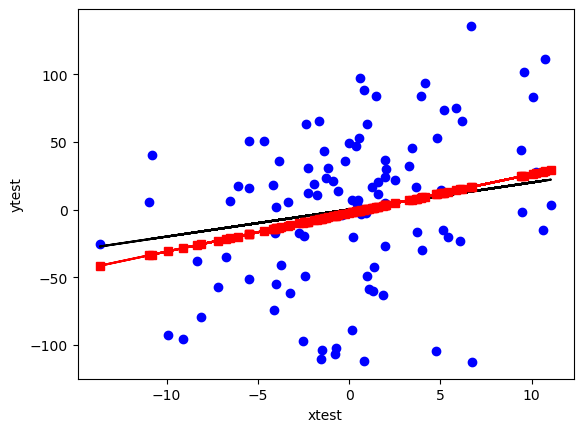

In [54]:
plt.figure()
plt.plot(xtest,ytest,'bo')
plt.plot(xtest,ylinear,'k-')
plt.plot(xtest,ypredict,'rs-')
plt.xlabel('xtest')
plt.ylabel('ytest')
plt.show()

### Optimization
*  Least squares fitting is the starting point for optimization. 
*  Optimization is a vast field focused on how to estimate the best parameters to fit a model to data. 
*  The concept of an error function is central to optimization, although you may encounter in different guises, including a likelihood (probability models) or a loss function (machine learning). 


###  Linear and Nonlinear Optimization 
* Linear Optimization problems are easy to solve and have direct solutions (usually by some derivative and some Algebra)
* Linear regression models use these methods and have exact solutions
* Even though they are "easy" to solve, they are still complicated models, with many decisions that determine scientific interpretability. 
* Interestingly, many nonlinear models can also be expressed as Linear Models through transformations, and have exact solutions 
* What matters for Linear optimization is whether the optimization problem is Linear, not if the model is Linear.   

## Exponential and Power Law Models 

* These are models that fit functions to data that are widely used to describe psychological data in the perception. 
* In COGS 107 you will tackle the Cognitive Model aspects of this more seriously than I will here.  Here I want to focus on the mathematics of these forms and how we can fit them to data. 
* In psychology applications, these laws are interested in how cognitive processes change over time, where time is usually, but not always, measured in terms of number of trials N. 

### Power function 

 $$ y = aN^{-b} $$

* Here y is a behavioral measure like response time, N indexes the trials starting at 1.  
* a,b,are the **parameters** of the model.  

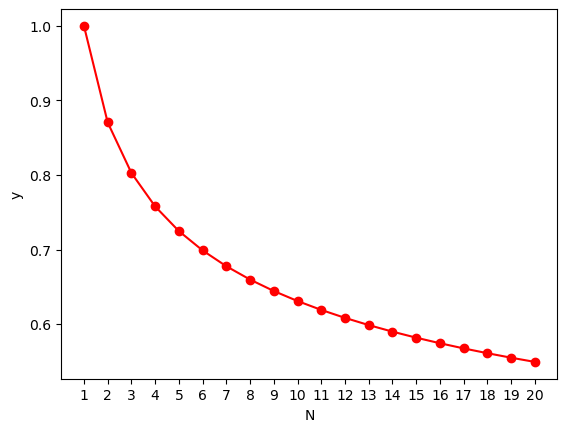

In [55]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*N**(-b)
#make a quick plot
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()


### Exponential Function 

$$ y = ae^{-b(N-1)} $$

* Here y is a behavioral measure like response time, N indexes the trials starting at 1. 
* a,b are the **parameters** of the model. 
* Note that in an exponential model, N-1 is needed, so that a still captures the starting value.  

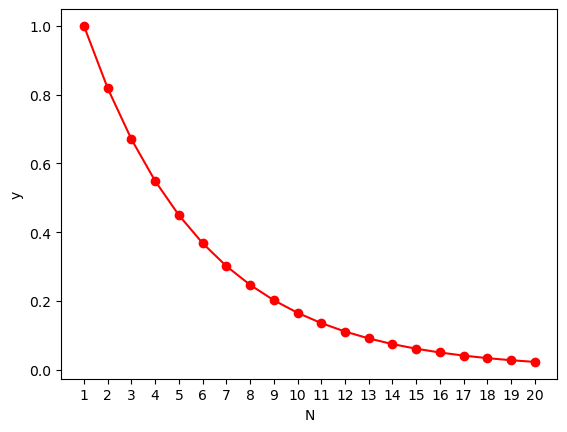

In [56]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*np.exp(-b*(N-1))
#make a quick plot
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()

### Example: Power Law of Practice: Repealed?  

Across a large variety of psychological experiments, 
*   simple reaction time
*   choice reaction time 
*   digit span
*   match to sample
 ....

* the power law of practice came into wide use, because it provided a useful way to capture how people improved performance with practice. 
* In 2000, a paper was published, 

Heathcote, A., Brown, S., & Mewhort, D. J. K. (2000). The power law repealed: The case for an exponential law of practice. Psychonomic Bulletin & Review, 7(2), 185-207.

* which showed that previous studies all used aggregated data across subjects in fitting a power law, and that individual subject data were better fit by an exponential law. 

### Why does this matter? 

* The two laws capture different ideas about learning.  Consider the m and m + 1 trial under each law. 

** Power Law** 

$$ y[m] = am^{-b} $$
$$ y[m+1] = a(m+1)^{-b} $$

$$ y[m+1]/y[m] = \frac{m+1}{m}^{-b} $$

** Exponential Law ** 

$$ y[m] = ae^{-b(m-1)} $$
$$ y[m+1] = ae^{-bm} $$

$$ y[m+1]/y[m] = e^{-b}$$

* In the Power Law, the amount of change in the function y (learning) decreases as the number of trials (N) increases.
* In the Exponential Law, the amount of change in the function y (learning) is a constant.  

** Fitting Power Functions with a Linear Model **

$$ y = aN^{-b} $$

$$ log(y) = log(a) -b*log(N) $$ 

** Fitting Exponential Functions with a Linear Model **

$$ y = ae^{-b(N-1)} $$

$$ ln(y) = ln(a) -b*(N-1) $$

** A log transform is your friend ** 